===== Primeras filas =====
   id_hecho  id_estudiante  id_programa  id_sede  id_tiempo  id_instructor  \
0         1            247            6        3          1             17   
1         2             81            8        4          5             15   
2         3            510            1        1          4             14   
3         4            312            4        4          3             12   
4         5            574            8        3          6             15   

   promedio  asistencia estado_academico        observaciones  
0      4.00       80.90           Activo   Baja participación  
1      3.08       95.10           Activo                  NaN  
2      3.18       80.05           Activo                  NaN  
3      3.32       75.10           Activo  Excelente desempeño  
4      3.39       72.10           Activo                  NaN  

===== Información del dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data colu

/tmp/ipython-input-2154282858.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=programa_riesgo.index, y=programa_riesgo['riesgo'], palette="Reds_r")


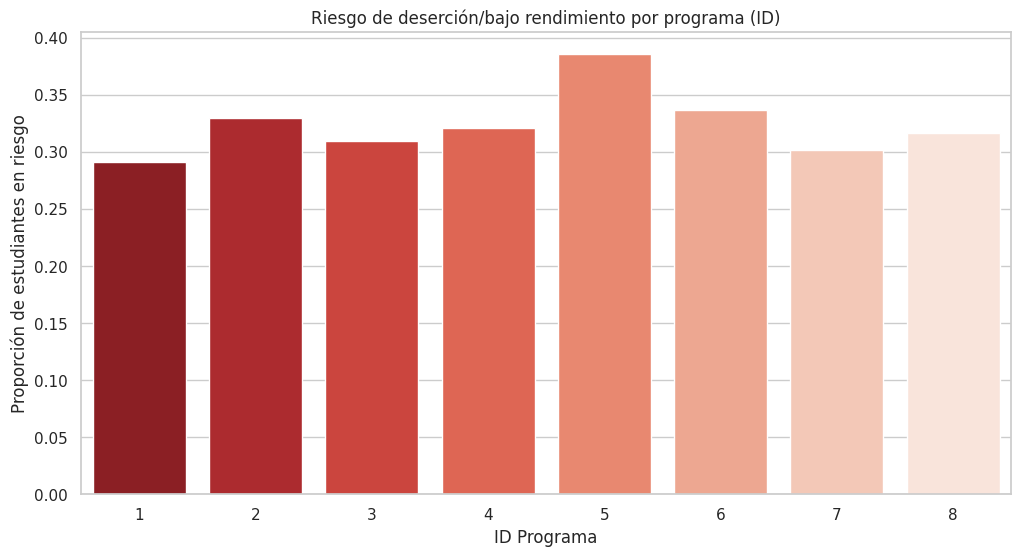

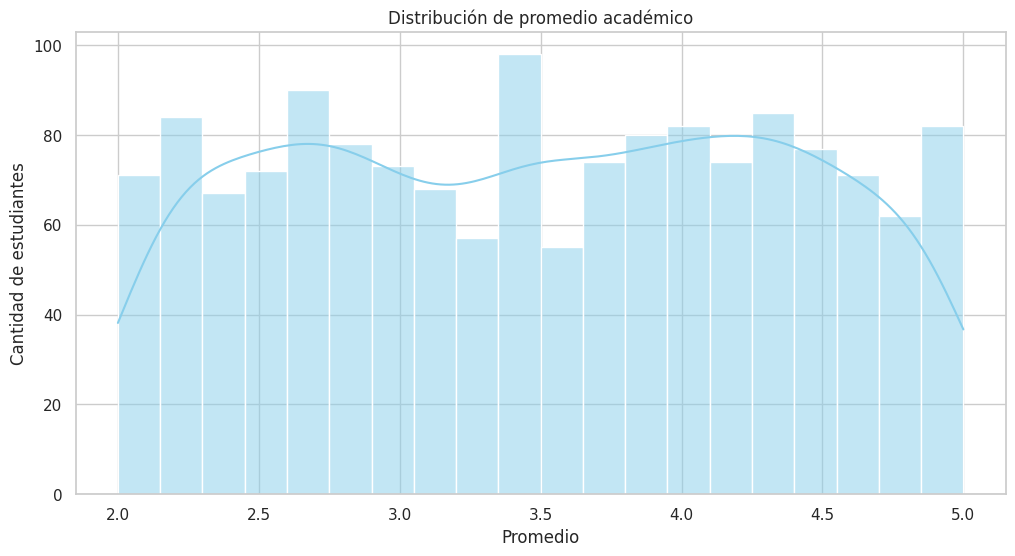

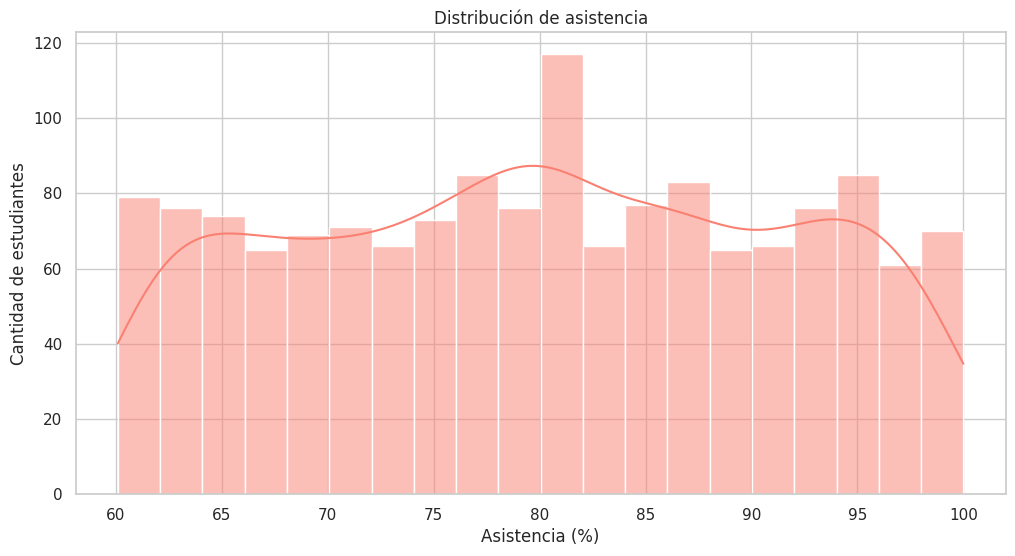

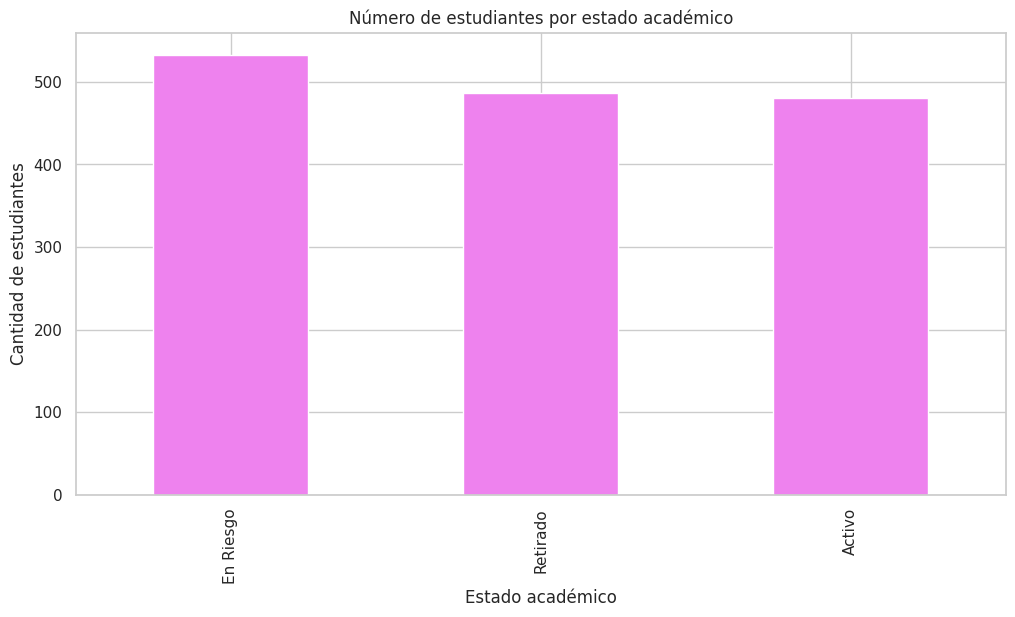


===== Promedio académico por instructor (ID) =====
id_instructor
11    3.631641
22    3.628525
19    3.612801
13    3.584954
18    3.580244
7     3.559896
24    3.541648
12    3.540780
14    3.534808
9     3.530784
20    3.529498
2     3.526364
4     3.524277
10    3.520483
17    3.511346
5     3.481700
16    3.476222
8     3.475769
3     3.471302
1     3.448934
25    3.388567
21    3.380923
23    3.348368
6     3.313448
15    3.312247
Name: promedio, dtype: float64


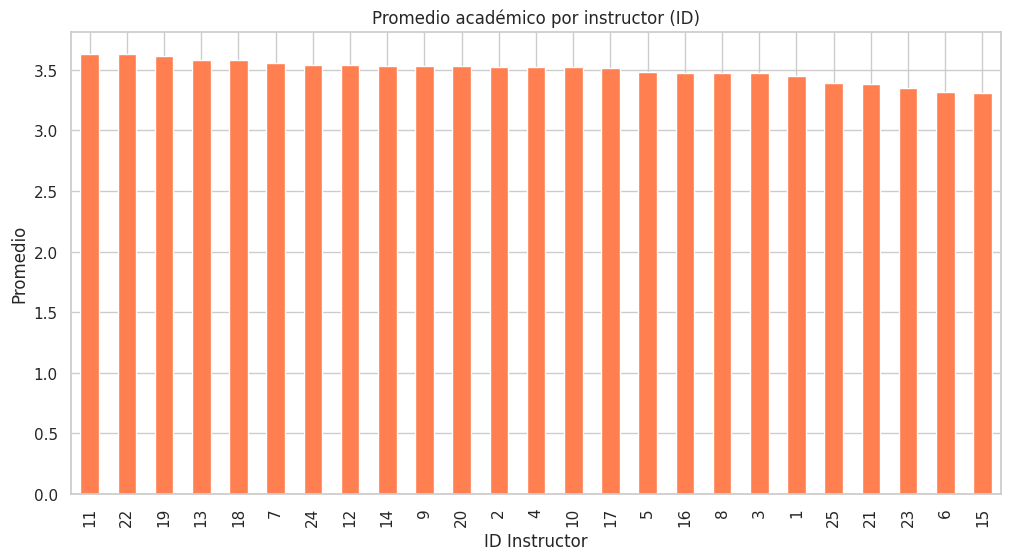

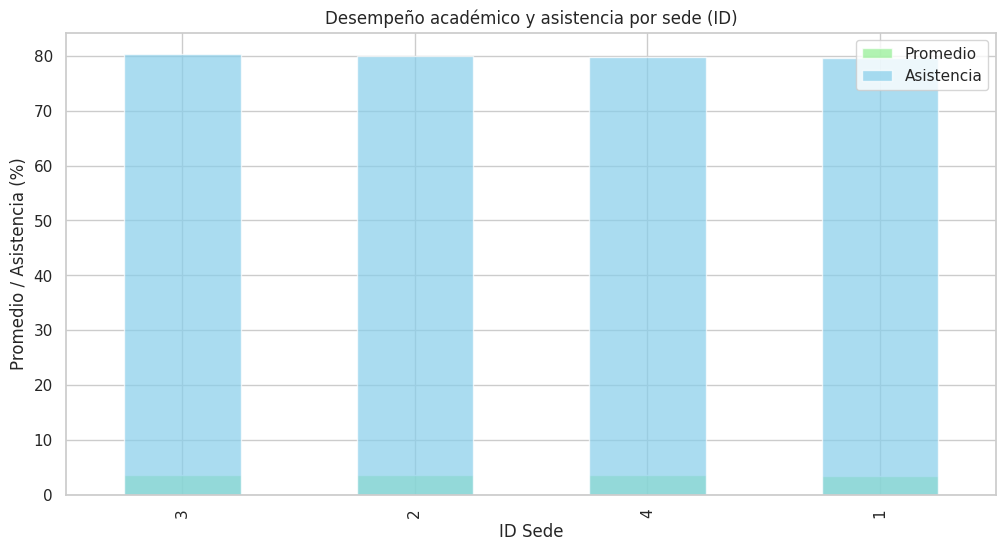

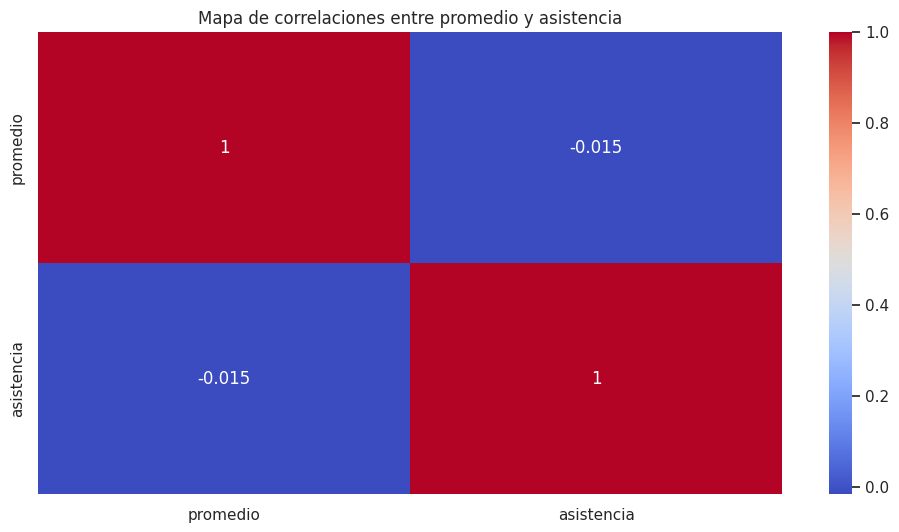

✅ EDA completo para el reto Talento Futuro (basado en IDs) finalizado.


In [ ]:
# =========================================================
# EDA Reto Talento Futuro - Instituto Técnico Laboral
# Dataset: hechos_academicos (IDs de programa, sede, instructor, estudiante)
# =========================================================

#  Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

#  Cargar dataset
df = pd.read_excel("/content/estudiantes_tecnicos_limpiiiio.xlsx")

#  Revision inicial
print("===== Primeras filas =====")
print(df.head())
print("\n===== Información del dataset =====")
print(df.info())
print("\n===== Estadísticas generales =====")
print(df.describe(include='all'))

#  Limpieza
# Números
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Categoricos
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna("Desconocido")

# Eliminar duplicados
df = df.drop_duplicates()

# 5️⃣ Identificar programas con mayor riesgo de deserción o bajo rendimiento
# Riesgo = proporción de estudiantes "Reprobado" o "Retirado"
programa_riesgo = df.groupby('id_programa')['estado_academico'].value_counts(normalize=True).unstack().fillna(0)
programa_riesgo['riesgo'] = programa_riesgo.get('Reprobado',0) + programa_riesgo.get('Retirado',0)
programa_riesgo = programa_riesgo.sort_values(by='riesgo', ascending=False)
print("\n===== Programas con mayor riesgo =====")
print(programa_riesgo[['riesgo']])

# Visualizacion
plt.figure()
sns.barplot(x=programa_riesgo.index, y=programa_riesgo['riesgo'], palette="Reds_r")
plt.title("Riesgo de deserción/bajo rendimiento por programa (ID)")
plt.xlabel("ID Programa")
plt.ylabel("Proporción de estudiantes en riesgo")
plt.show()

#  Distribución de promedio academico
plt.figure()
sns.histplot(df['promedio'], bins=20, kde=True, color='skyblue')
plt.title("Distribución de promedio académico")
plt.xlabel("Promedio")
plt.ylabel("Cantidad de estudiantes")
plt.show()

#  Distribucion de asistencia
plt.figure()
sns.histplot(df['asistencia'], bins=20, kde=True, color='salmon')
plt.title("Distribución de asistencia")
plt.xlabel("Asistencia (%)")
plt.ylabel("Cantidad de estudiantes")
plt.show()

#  Estado academico general
estado_counts = df['estado_academico'].value_counts()
plt.figure()
estado_counts.plot(kind='bar', color='violet')
plt.title("Numero de estudiantes por estado academico")
plt.xlabel("Estado académico")
plt.ylabel("Cantidad de estudiantes")
plt.show()

#  Analisis de efectividad de instructores
instr_promedio = df.groupby('id_instructor')['promedio'].mean().sort_values(ascending=False)
print("\n===== Promedio académico por instructor (ID) =====")
print(instr_promedio)

plt.figure()
instr_promedio.plot(kind='bar', color='coral')
plt.title("Promedio académico por instructor (ID)")
plt.xlabel("ID Instructor")
plt.ylabel("Promedio")
plt.show()

#  Analisis de desempeño por sede
sede_promedio = df.groupby('id_sede')['promedio'].mean().sort_values(ascending=False)
sede_asistencia = df.groupby('id_sede')['asistencia'].mean().sort_values(ascending=False)

plt.figure()
sede_promedio.plot(kind='bar', color='lightgreen', alpha=0.7, label='Promedio')
sede_asistencia.plot(kind='bar', color='skyblue', alpha=0.7, label='Asistencia')
plt.title("Desempeño académico y asistencia por sede (ID)")
plt.xlabel("ID Sede")
plt.ylabel("Promedio / Asistencia (%)")
plt.legend()
plt.show()

#  Correlaciones
num_vars = ['promedio','asistencia']
plt.figure()
sns.heatmap(df[num_vars].corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlaciones entre promedio y asistencia")
plt.show()

#  Anaalisis de rentabilidad (aproximada)
# Suponiendo que costo_matricula y duracion_meses son parte de df
if 'costo_matricula' in df.columns and 'duracion_meses' in df.columns:
    programa_valor = df.groupby('id_programa').agg(
        estudiantes_activos=('id_estudiante', 'count'),
        promedio_academico=('promedio', 'mean'),
        costo_matricula=('costo_matricula', 'mean'),
        duracion_meses=('duracion_meses', 'mean')
    )
    programa_valor['valor_relativo'] = (programa_valor['estudiantes_activos'] * programa_valor['promedio_academico']) / programa_valor['costo_matricula']
    programa_valor = programa_valor.sort_values(by='valor_relativo', ascending=False)
    print("\n===== Programas con mayor valor relativo (ID) =====")
    print(programa_valor[['valor_relativo','estudiantes_activos','promedio_academico','costo_matricula']])

    plt.figure()
    sns.barplot(x=programa_valor.index, y=programa_valor['valor_relativo'], palette="viridis")
    plt.title("Valor relativo de programas (ID)")
    plt.xlabel("ID Programa")
    plt.ylabel("Valor relativo")
    plt.show()

print("✅ EDA completo para el reto Talento Futuro (basado en IDs) finalizado.")


Saving dim_estudiantes.xlsx to dim_estudiantes (2).xlsx
Primeras filas:


,id_estudiante,nombre_completo,genero,edad,estrato,barrio,contacto_email,telefono
0,1,Mateo Pérez Rodríguez,M,24.0,4.0,Buenos Aires,mateopérezrodríguez@gmail.com,3210053353
1,2,Jorge Gómez Ortiz,M,18.0,6.0,Robledo,NaN,3334760738
2,3,Andrés Ramírez Ortiz,M,22.0,6.0,Itagüí,andrésramírezortiz@gmail.com,3797808098
3,4,Jorge Restrepo López,M,26.0,4.0,Envigado,jorgerestrepolópez@gmail.com,3106977991
4,5,Daniel Restrepo Jiménez,M,22.0,5.0,Belén,danielrestrepojiménez@gmail.com,3919795579



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_estudiante    600 non-null    int64  
 1   nombre_completo  600 non-null    object 
 2   genero           600 non-null    object 
 3   edad             555 non-null    float64
 4   estrato          521 non-null    float64
 5   barrio           600 non-null    object 
 6   contacto_email   562 non-null    object 
 7   telefono         600 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 37.6+ KB
None

Promedios por género:


,genero,edad,estrato
0,F,23.136986,3.581227
1,M,22.908367,3.426724
2,Otro,20.583333,3.833333


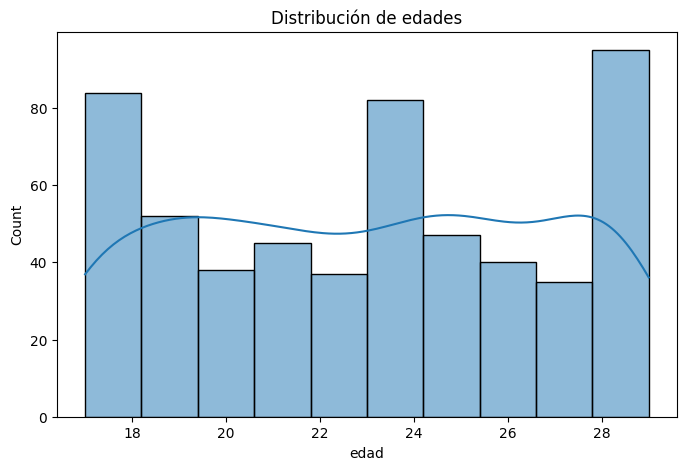

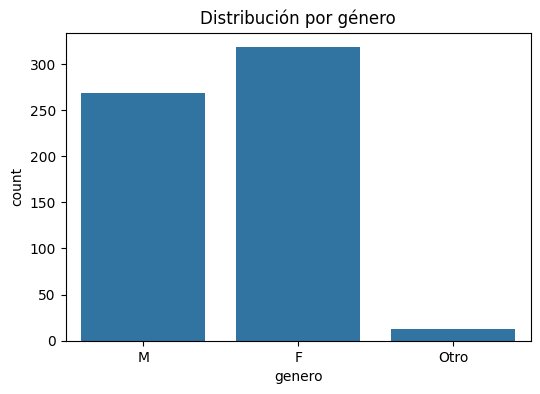

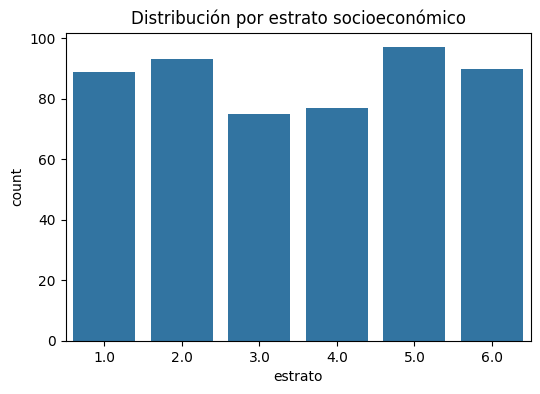

In [ ]:
# --
!pip install pandas seaborn matplotlib openpyxl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---
from google.colab import files
uploaded = files.upload()


df = pd.read_excel("/content/dim_estudiantes (1).xlsx")


print("Primeras filas:")
display(df.head())
print("\nInformación del DataFrame:")
print(df.info())


df["edad"] = pd.to_numeric(df["edad"], errors="coerce")
df["estrato"] = pd.to_numeric(df["estrato"], errors="coerce")


if 'genero' in df.columns:
    desempeno_genero = df.groupby("genero")[["edad", "estrato"]].mean().reset_index()
    print("\nPromedios por género:")
    display(desempeno_genero)
else:
    print("\nColumn 'genero' not found in DataFrame. Skipping analysis by gender.")



if 'edad' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df["edad"], kde=True, bins=10)
    plt.title("Distribución de edades")
    plt.show()
else:
    print("\nColumn 'edad' not found in DataFrame. Skipping age distribution plot.")


if 'genero' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="genero")
    plt.title("Distribución por género")
    plt.show()
else:
    print("\nColumn 'genero' not found in DataFrame. Skipping gender distribution plot.")


if 'estrato' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="estrato")
    plt.title("Distribución por estrato socioeconómico")
    plt.show()
else:
    print("\nColumn 'estrato' not found in DataFrame. Skipping estrato distribution plot.")